In [4]:
# Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from matplotlib import dates as mdates


In [5]:
# Load data
ittfaFile = "../resources/ittfa_2009-2020.csv"
ittfa_df = pd.read_csv(ittfaFile)
ittfa_df.head()

,year,month,passengers_in,passengers_out,passengers_total,freight_in,freight_out,freight_total,mail_in,mail_out,...,flights_total,passengers_incl_transit_in,passengers_incl_transit_out,passengers_incl_transit_total,available_seats_in,available_seats_out,available_seats_total,seat_utilisation_in,seat_utilisation_out,seat_utilisation_total
0,2009,Jan,1223646,1025778,2249424,25791781,26785552,52577333,1744015,1013329,...,11811,1244404,1045681,2290085,1457769,1457446,2915215,85.363593,71.747495,78.556299
1,2009,Feb,969607,823540,1793147,27184874,27304789,54489663,1594689,909102,...,10177,989205,842937,1832142,1257714,1255734,2513448,78.651029,67.127035,72.893571
2,2009,Mar,937697,933843,1871540,31509322,29527013,61036335,1713906,1052860,...,11159,955905,952070,1907975,1370622,1372128,2742750,69.742424,69.386384,69.564306
3,2009,Apr,971404,1004204,1975608,28921311,26224702,55146013,1710087,890318,...,10951,986957,1019694,2006651,1341715,1340952,2682667,73.559362,76.042543,74.800600
4,2009,May,842073,922435,1764508,31179480,24396268,55575748,1870405,961951,...,10914,855367,935498,1790865,1341071,1342106,2683177,63.782380,69.703734,66.744199


In [6]:
#select the data that we need
ratioData = ittfa_df[['year','month','passengers_incl_transit_total','freight_total','mail_total','flights_total']]
ratioData.head()

,year,month,passengers_incl_transit_total,freight_total,mail_total,flights_total
0,2009,Jan,2290085,52577333,2757344,11811
1,2009,Feb,1832142,54489663,2503791,10177
2,2009,Mar,1907975,61036335,2766766,11159
3,2009,Apr,2006651,55146013,2600405,10951
4,2009,May,1790865,55575748,2832356,10914


In [7]:
# Create new column for predicted passenger weight
# https://www.easa.europa.eu/sites/default/files/dfu/Weight%20Survey%20R20090095%20Final.pdf
ratioData['passenger_weight'] = ratioData.passengers_incl_transit_total * 83.8 + 16.7 # Av Wt Px & Av Wt Carry On + Av Wt Luggage
ratioData['passenger_weight_per_flight'] = ratioData.passenger_weight / ratioData.flights_total # Whats the weight per flight

In [8]:
# Calculate per flight values for data points

ratioData['passengers_per_flight'] = ratioData.passengers_incl_transit_total / ratioData.flights_total
ratioData['freight_per_flight'] = ratioData.freight_total / ratioData.flights_total
ratioData['mail_per_flight'] = ratioData.mail_total / ratioData.flights_total
ratioData.head()

,year,month,passengers_incl_transit_total,freight_total,mail_total,flights_total,passenger_weight,passenger_weight_per_flight,passengers_per_flight,freight_per_flight,mail_per_flight
0,2009,Jan,2290085,52577333,2757344,11811,191909139.7,16248.339658,193.894251,4451.556430,233.455592
1,2009,Feb,1832142,54489663,2503791,10177,153533516.3,15086.323701,180.027710,5354.197013,246.024467
2,2009,Mar,1907975,61036335,2766766,11159,159888321.7,14328.194435,170.980823,5469.695761,247.940317
3,2009,Apr,2006651,55146013,2600405,10951,168157370.5,15355.435166,183.239065,5035.705689,237.458223
4,2009,May,1790865,55575748,2832356,10914,150074503.7,13750.641717,164.088785,5092.152098,259.515851


In [9]:
# Create an overall date column
# As the data provides year and month, we need a full data for matplotlib to play nice
# Assuming 1st of month for sake of plotting
ratioData['date'] = '01/' + ratioData['month'].map(str)+ '/' +ratioData['year'].map(str)
ratioData['date'] = pd.to_datetime(ratioData['date'], format='%d/%b/%Y', errors='coerce')
ratioData


,year,month,passengers_incl_transit_total,freight_total,mail_total,flights_total,passenger_weight,passenger_weight_per_flight,passengers_per_flight,freight_per_flight,mail_per_flight,date
0,2009,Jan,2290085,52577333,2757344,11811,191909139.7,16248.339658,193.894251,4451.556430,233.455592,2009-01-01
1,2009,Feb,1832142,54489663,2503791,10177,153533516.3,15086.323701,180.027710,5354.197013,246.024467,2009-02-01
2,2009,Mar,1907975,61036335,2766766,11159,159888321.7,14328.194435,170.980823,5469.695761,247.940317,2009-03-01
3,2009,Apr,2006651,55146013,2600405,10951,168157370.5,15355.435166,183.239065,5035.705689,237.458223,2009-04-01
4,2009,May,1790865,55575748,2832356,10914,150074503.7,13750.641717,164.088785,5092.152098,259.515851,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
138,2020,Jul,73851,68331028,1624570,3046,6188730.5,2031.756566,24.245240,22433.036113,533.345371,2020-07-01
139,2020,Aug,71998,74106403,1607563,3309,6033449.1,1823.345150,21.758235,22395.407374,485.815352,2020-08-01
140,2020,Sep,62120,74914263,1707199,3279,5205672.7,1587.579353,18.944800,22846.679780,520.646234,2020-09-01
141,2020,Oct,69177,78271380,1828063,3607,5797049.3,1607.166426,19.178542,21699.855836,506.809814,2020-10-01


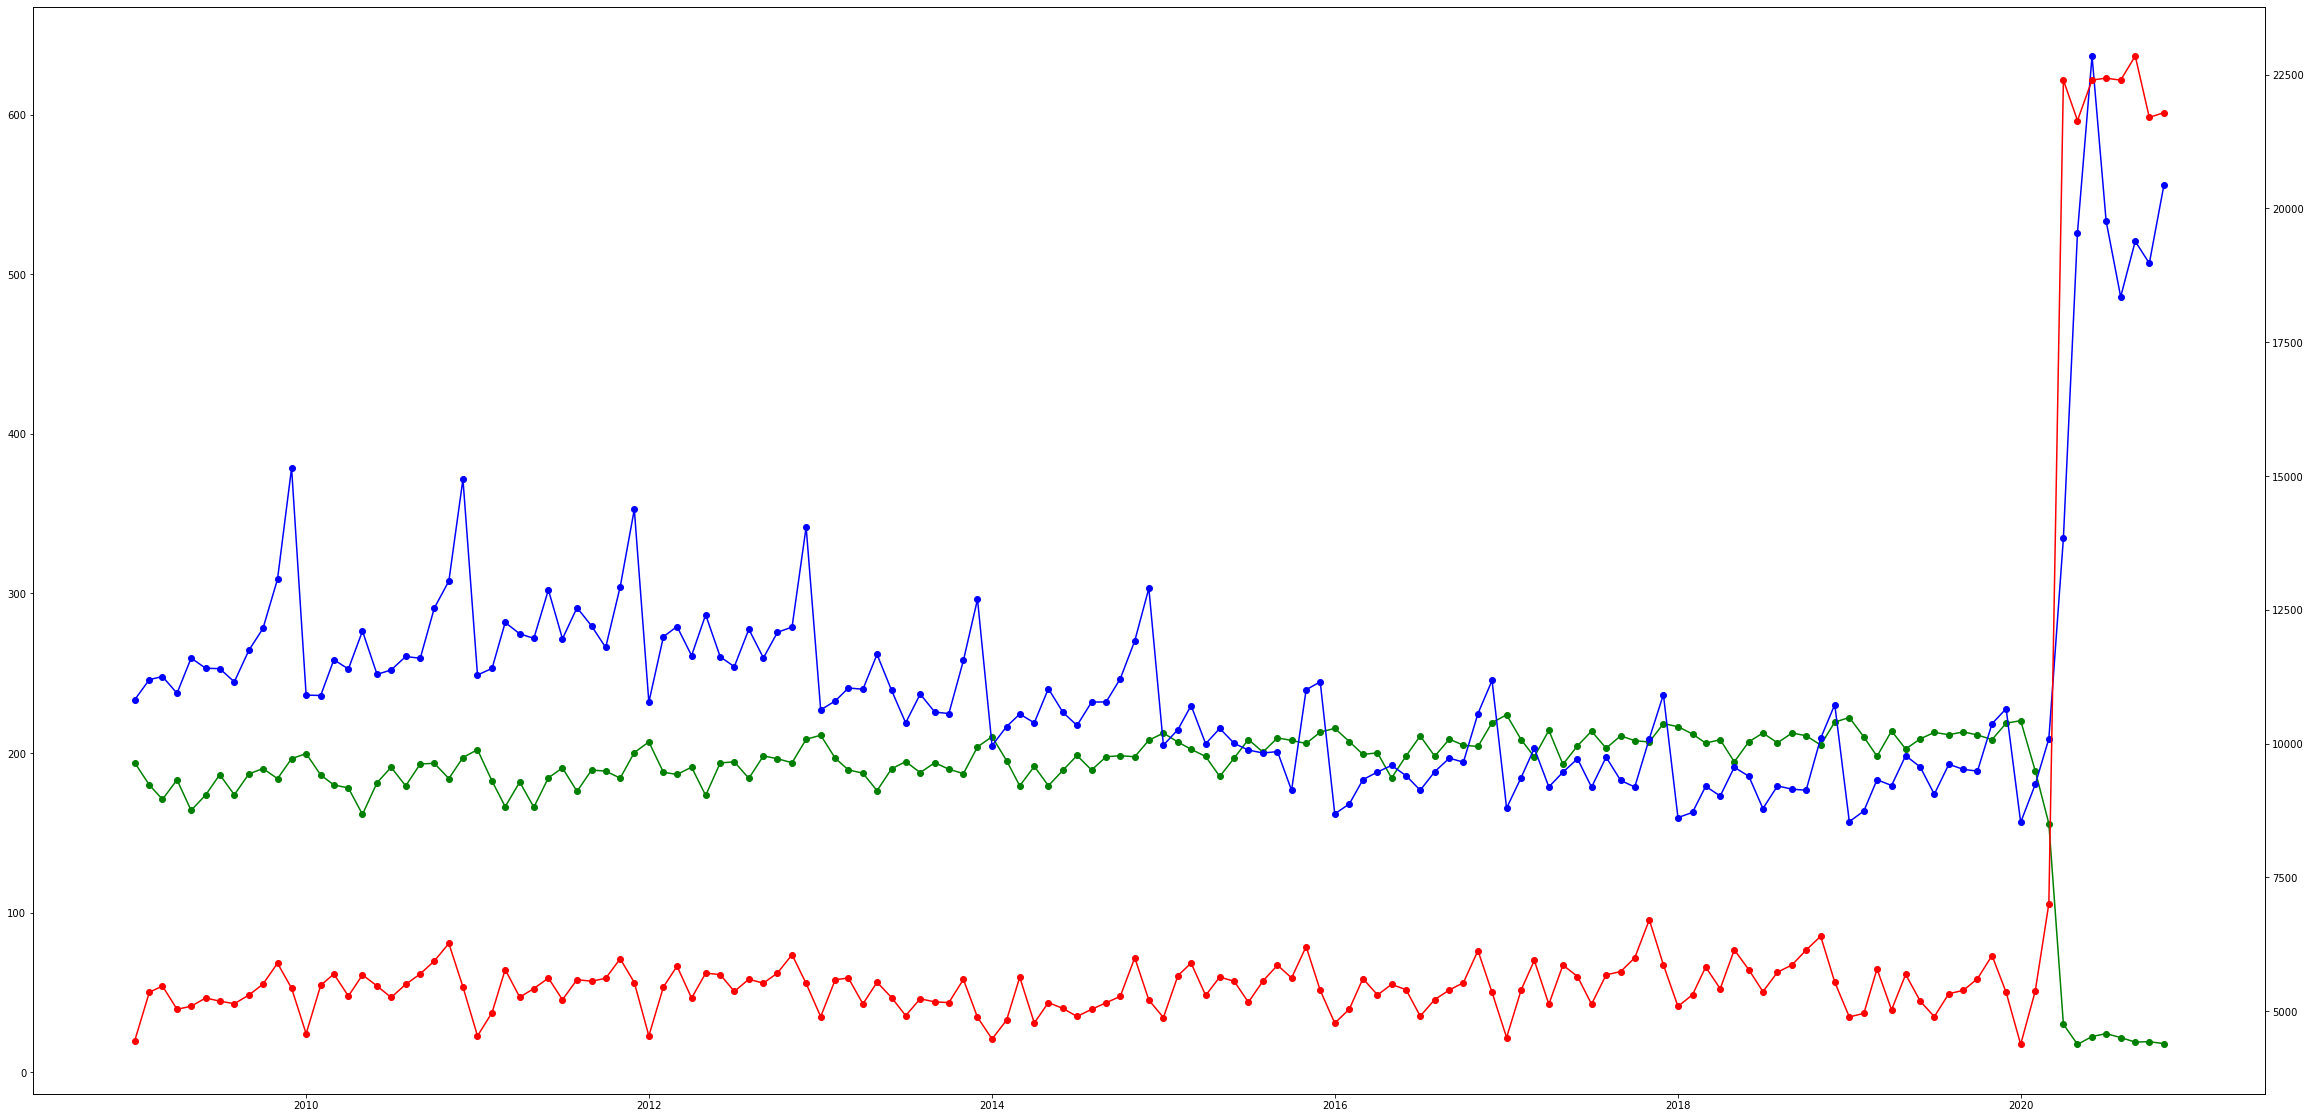

In [10]:
# Plotting all the data on one graph for the sake of visualising it all

fig, ax1 = plt.subplots(figsize=(40,20))
ax1.plot_date(ratioData['date'], ratioData['passengers_per_flight'],linestyle='-',color='g')
ax1.plot_date(ratioData['date'], ratioData['mail_per_flight'],linestyle='-',color='b')
ax2 = ax1.twinx() # Double Y Axes
ax2.plot_date(ratioData['date'], ratioData['freight_per_flight'],linestyle='-',color='r')
plt.show()

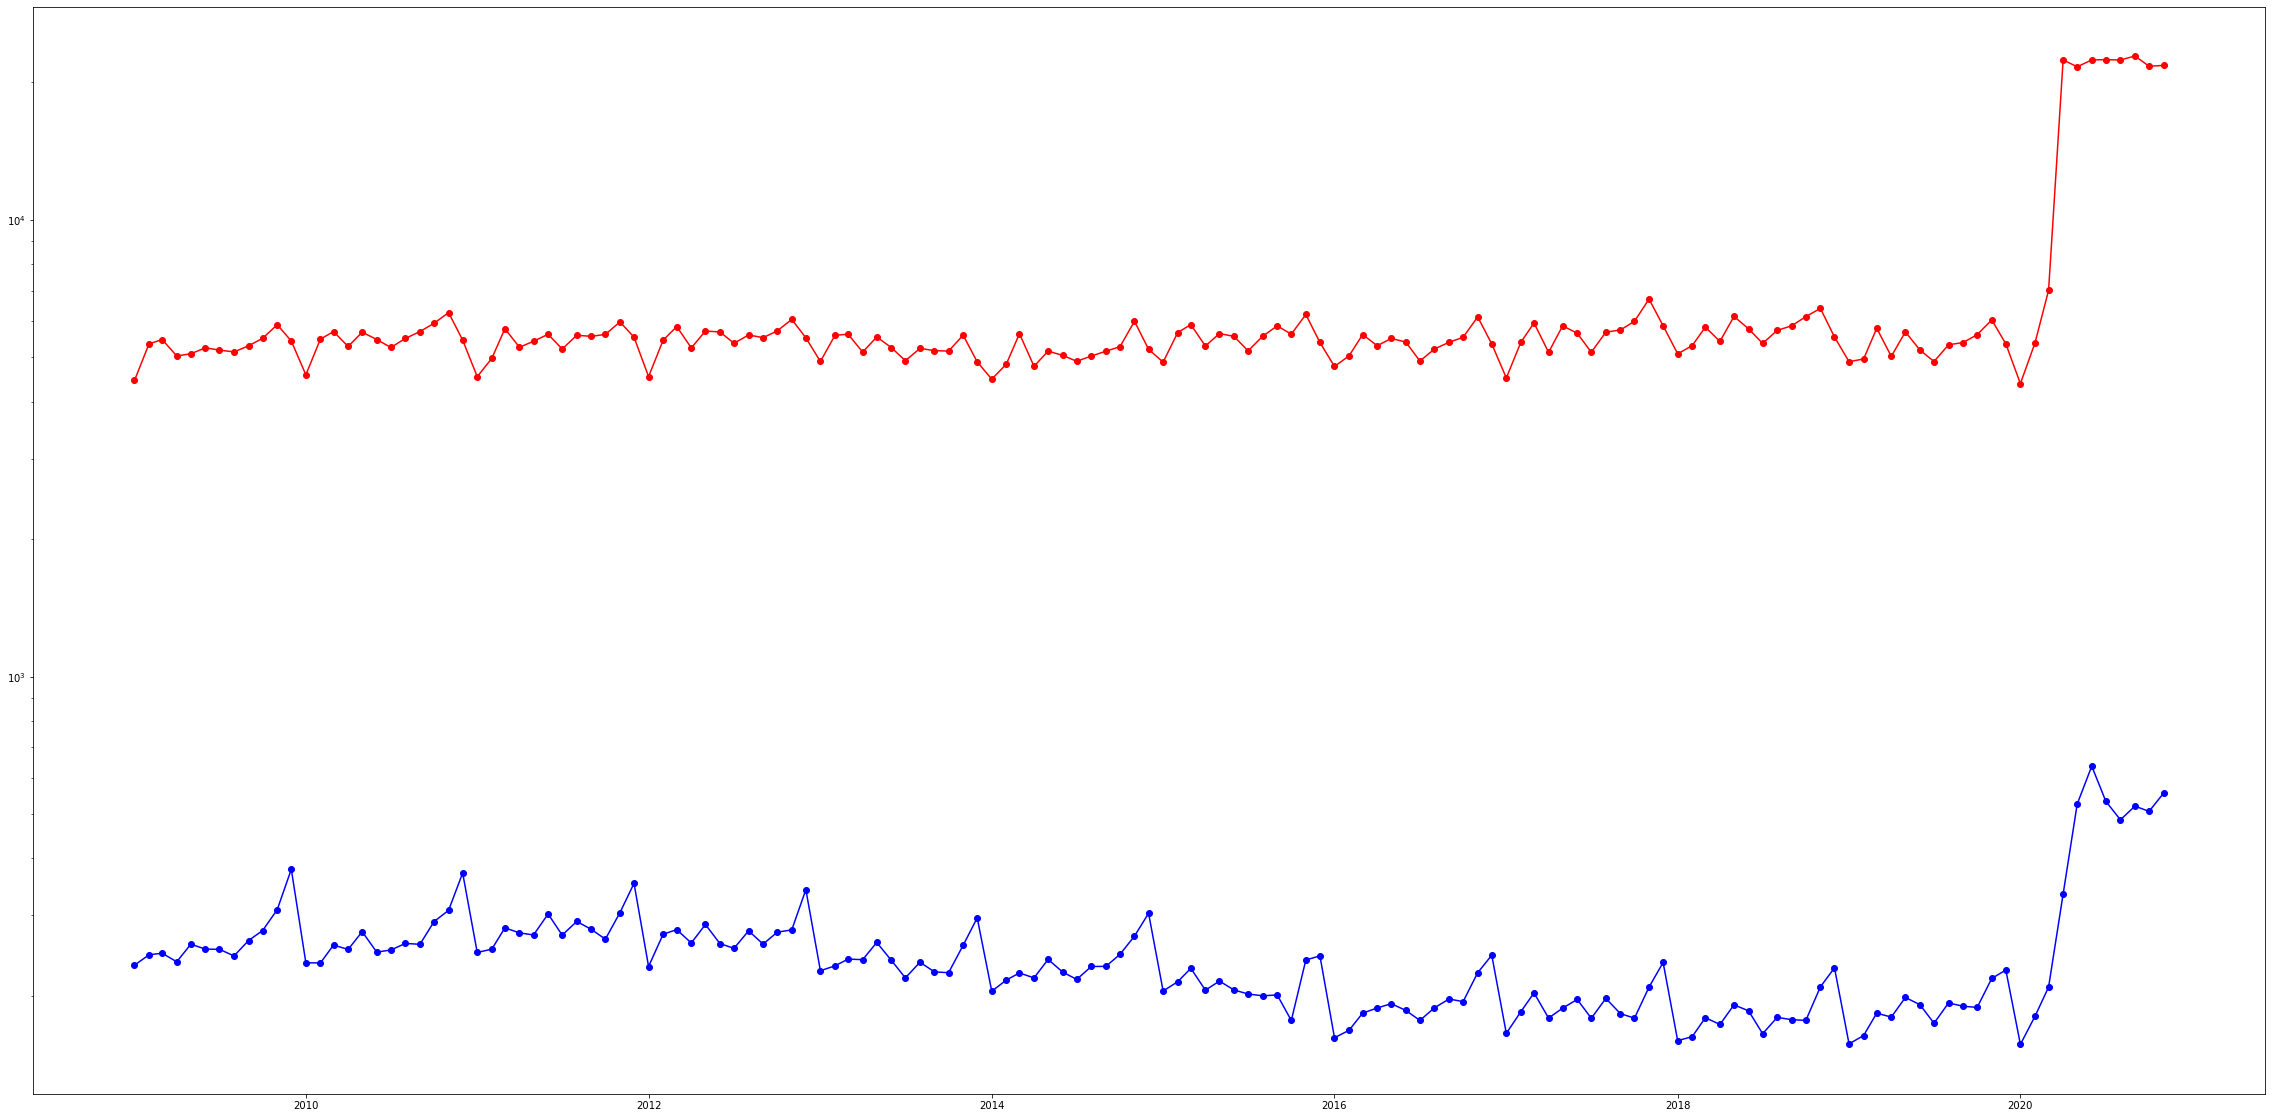

In [11]:
# Testing to see if things look better as a log graph - it does not
fig, ax1 = plt.subplots(figsize=(40,20))
ax1.plot_date(ratioData['date'], ratioData['freight_per_flight'],linestyle='-',color='r')
ax1.plot_date(ratioData['date'], ratioData['mail_per_flight'],linestyle='-',color='b')
ax1.set_yscale('log')
plt.show()

In [12]:
# Creating a group by based on year
ratioData_group = ratioData.groupby('year')
ratioData_group.sum()

,passengers_incl_transit_total,freight_total,mail_total,flights_total,passenger_weight,passenger_weight_per_flight,passengers_per_flight,freight_per_flight,mail_per_flight
year,,,,,,,,,
2009,24764814,714355777,36434649,135848,2.075292e+09,183020.964364,2184.020843,63108.401053,3204.882255
2010,27121025,806401691,39706848,146041,2.272742e+09,186510.346170,2225.660259,66300.752647,3251.339187
2011,28551646,838471733,43826380,154653,2.392628e+09,185428.989764,2212.756255,65085.273060,3397.959485
2012,30499257,870105295,43156007,157796,2.555838e+09,194069.925896,2315.870055,66249.448696,3279.647896
2013,32297444,878794900,40615570,167723,2.706526e+09,193459.573812,2308.586628,63001.264534,2902.182303
2014,34196795,898783372,41450052,175515,2.865692e+09,195681.018045,2335.095517,61517.543192,2831.867237
2015,36014341,978847712,37361209,176349,3.018002e+09,205106.404913,2447.570301,66746.146096,2540.499528
2016,38933890,1016765274,36634805,190376,3.262660e+09,205326.916147,2450.201712,64166.822858,2306.009208
2017,41113457,1107732431,37767246,196864,3.445308e+09,209704.976893,2502.445879,67615.449613,2299.805849


In [13]:
#Just checking to see if the group works
ratioData_group['flights_total'].sum()

year
2009    135848
2010    146041
2011    154653
2012    157796
2013    167723
2014    175515
2015    176349
2016    190376
2017    196864
2018    204953
2019    206430
2020     71641
Name: flights_total, dtype: int64

In [14]:
# barPlot = ratioData_group[['passengers_incl_transit_total','freight_total','mail_total']].sum()
# barPlot.plot(kind='line',figsize=(40,20))
# plt.yscale('log')
# plt.grid()
# At this point I'm deciding it's probably not worth doing the group by 

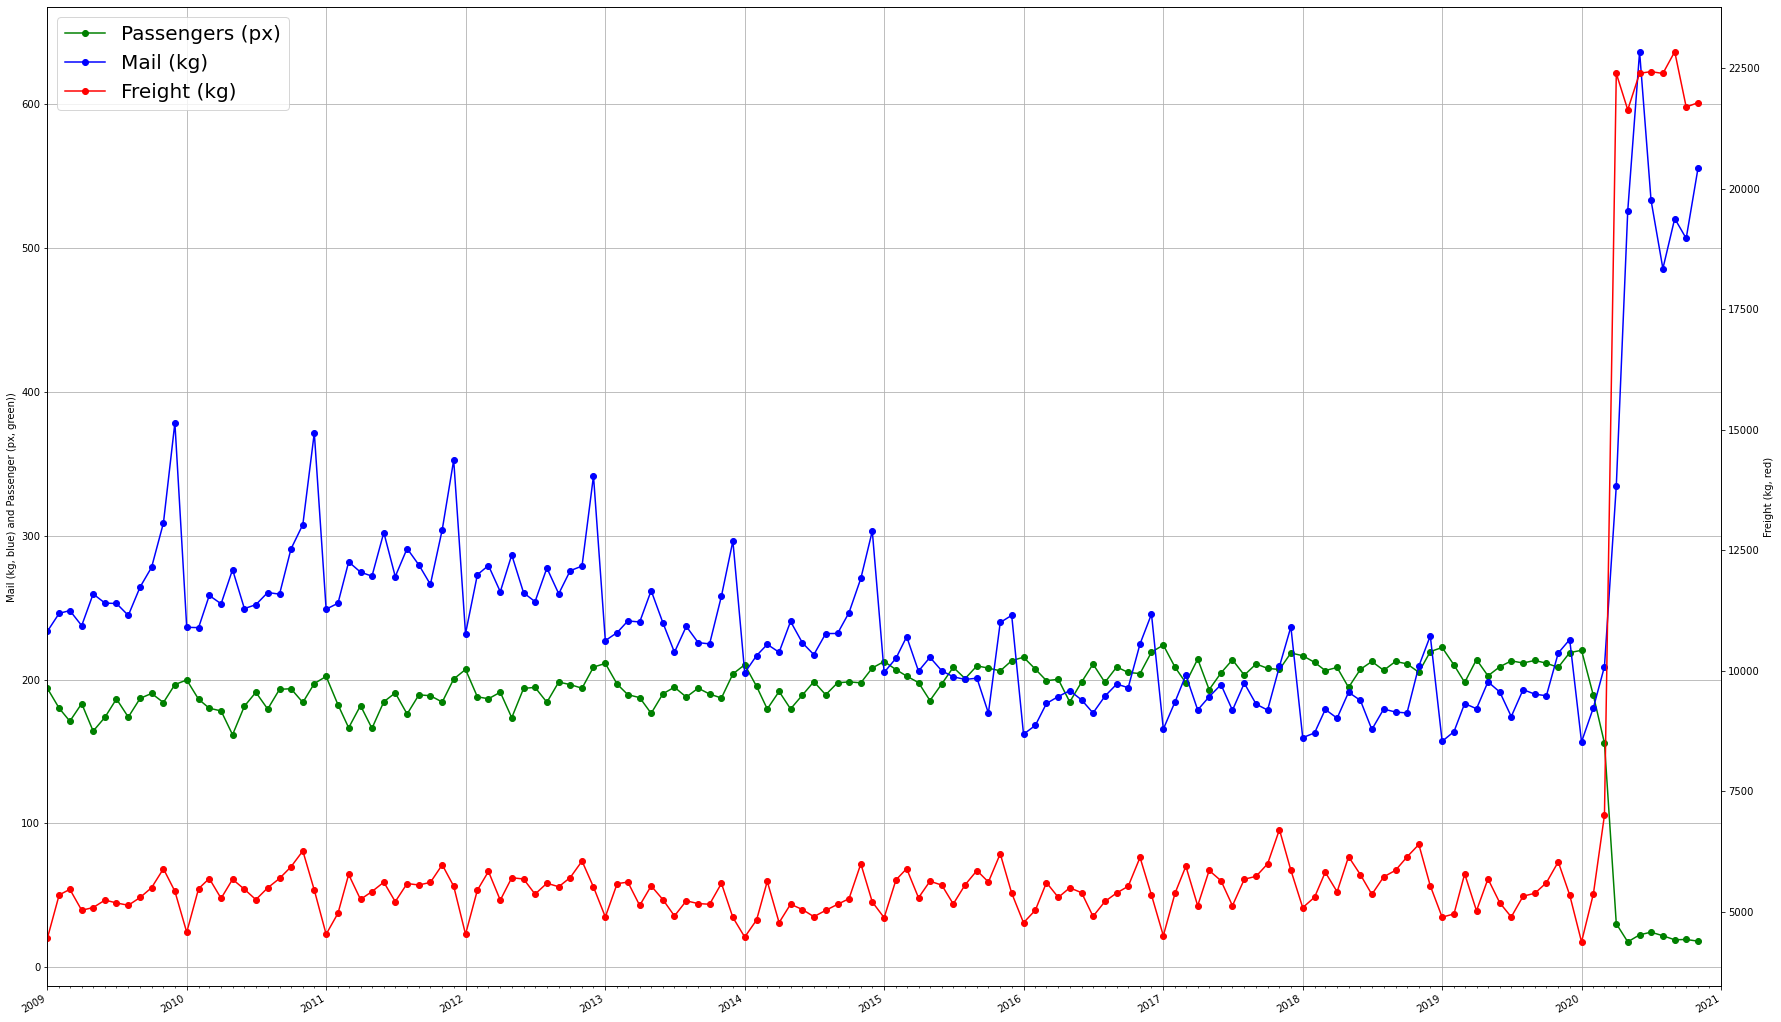

In [15]:
# Plotting everything on the same graph to just understand what's going on
# Freight is so huge it makes everything look like nothing
# This was mainly a test to make sure that I can get everything plotted nicely without the x-axes looking super confusing

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y') # Formatting like this because stack overflow says this is how it be prettier

fig, ax = plt.subplots(figsize=(30,20))
# the Lns is a secret trick that helps us later! (legend)
lns1 = ax.plot(ratioData['date'], ratioData['passengers_per_flight'],marker='o',linestyle='-',color='g',label='Passengers (px)')
lns2 = ax.plot(ratioData['date'], ratioData['mail_per_flight'],marker='o',linestyle='-',color='b',label='Mail (kg)')
ax2 = ax.twinx() # Double axes 
lns3 = ax2.plot_date(ratioData['date'], ratioData['freight_per_flight'],linestyle='-',color='r',label='Freight (kg)')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
lastdate = ratioData['date'][len(ratioData['date'])-1]
datemin = np.datetime64(ratioData['date'][0], 'Y')
datemax = np.datetime64(lastdate, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# Set labels and make a combined legend that I can size appropriately
ax.set_ylabel('Mail (kg, blue) and Passenger (px, green))')
ax2.set_ylabel('Freight (kg, red)')
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, prop={'size':20})

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

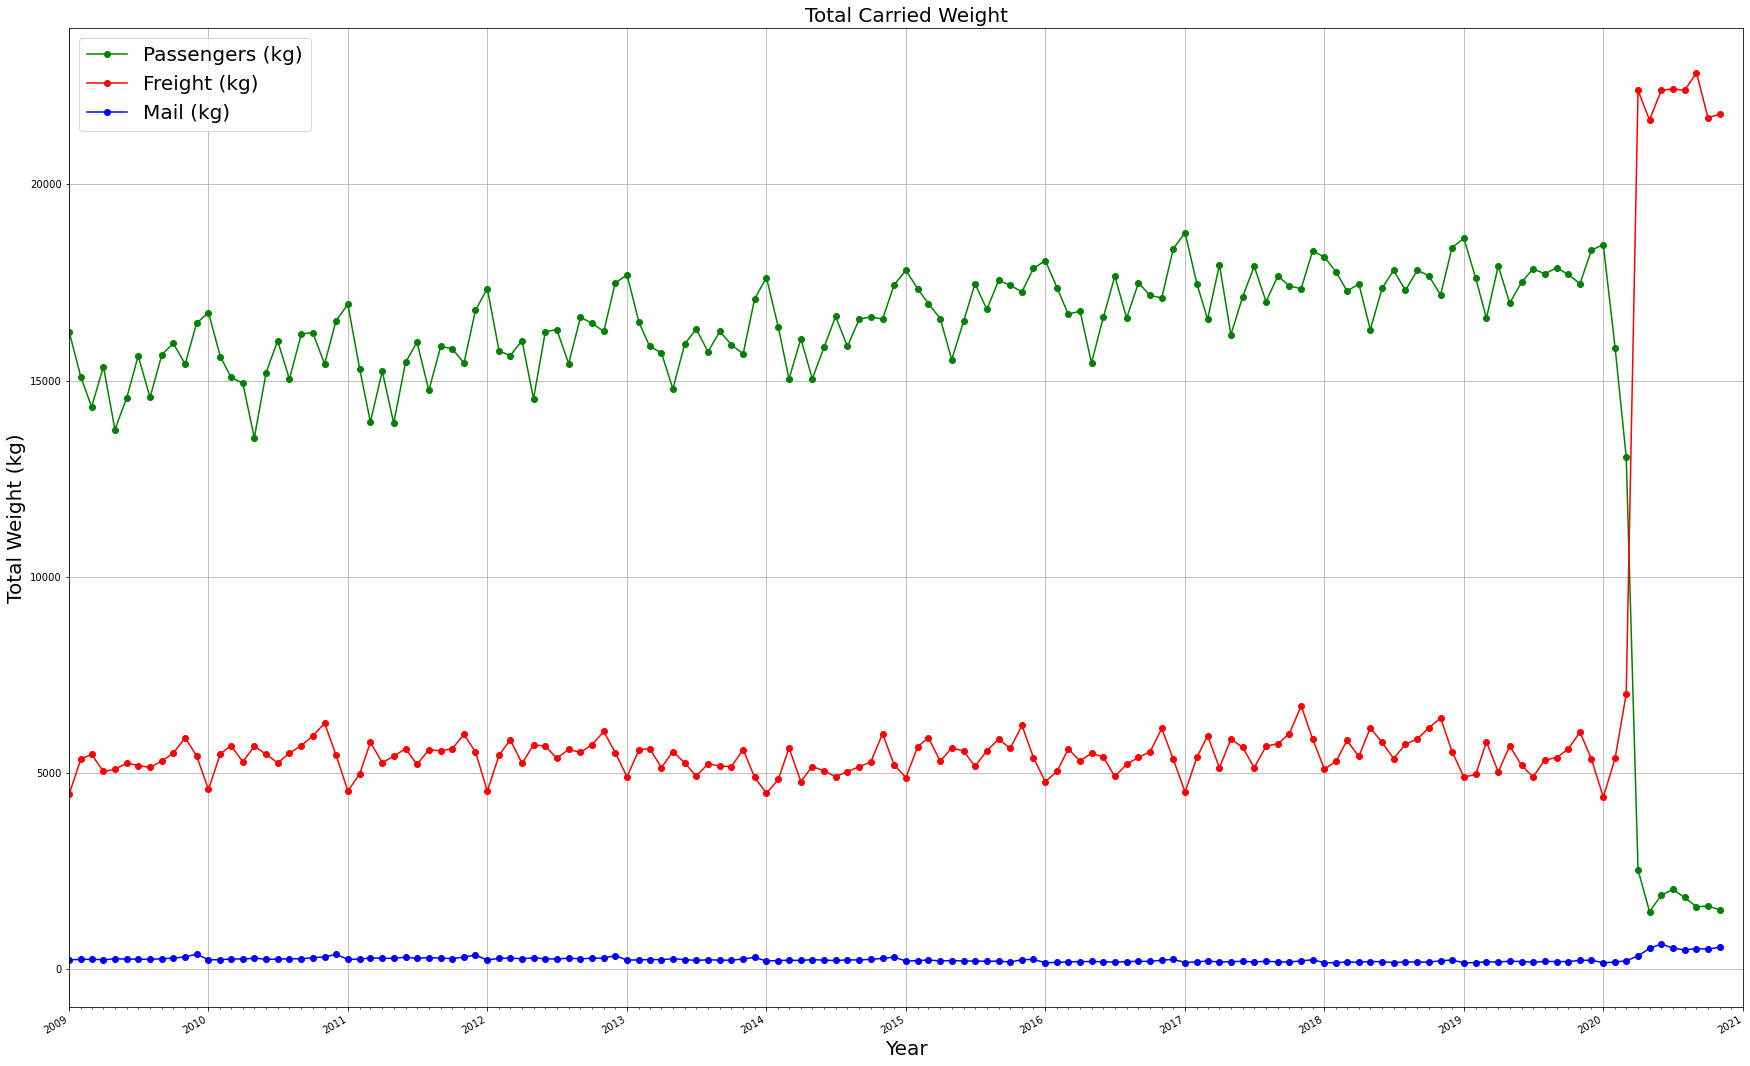

In [24]:

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y') # Formatting like this because stack overflow says this is how it be prettier

fig, ax = plt.subplots(figsize=(30,20))
# the Lns is a secret trick that helps us later! (legend)
lns1 = ax.plot(ratioData['date'], ratioData['passenger_weight_per_flight'],marker='o',linestyle='-',color='g',label='Passengers (kg)')
lns2 = ax.plot_date(ratioData['date'], ratioData['freight_per_flight'],linestyle='-',color='r',label='Freight (kg)')
lns3 = ax.plot_date(ratioData['date'], ratioData['mail_per_flight'],linestyle='-',color='b',label='Mail (kg)')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
lastdate = ratioData['date'][len(ratioData['date'])-1]
datemin = np.datetime64(ratioData['date'][0], 'Y')
datemax = np.datetime64(lastdate, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# Set labels and make a combined legend that I can size appropriately
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, prop={'size':20})

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.title('Total Carried Weight',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total Weight (kg)', fontsize=20)
plt.savefig('../images/total_carried_weight_per_flight_line.png')
plt.show()

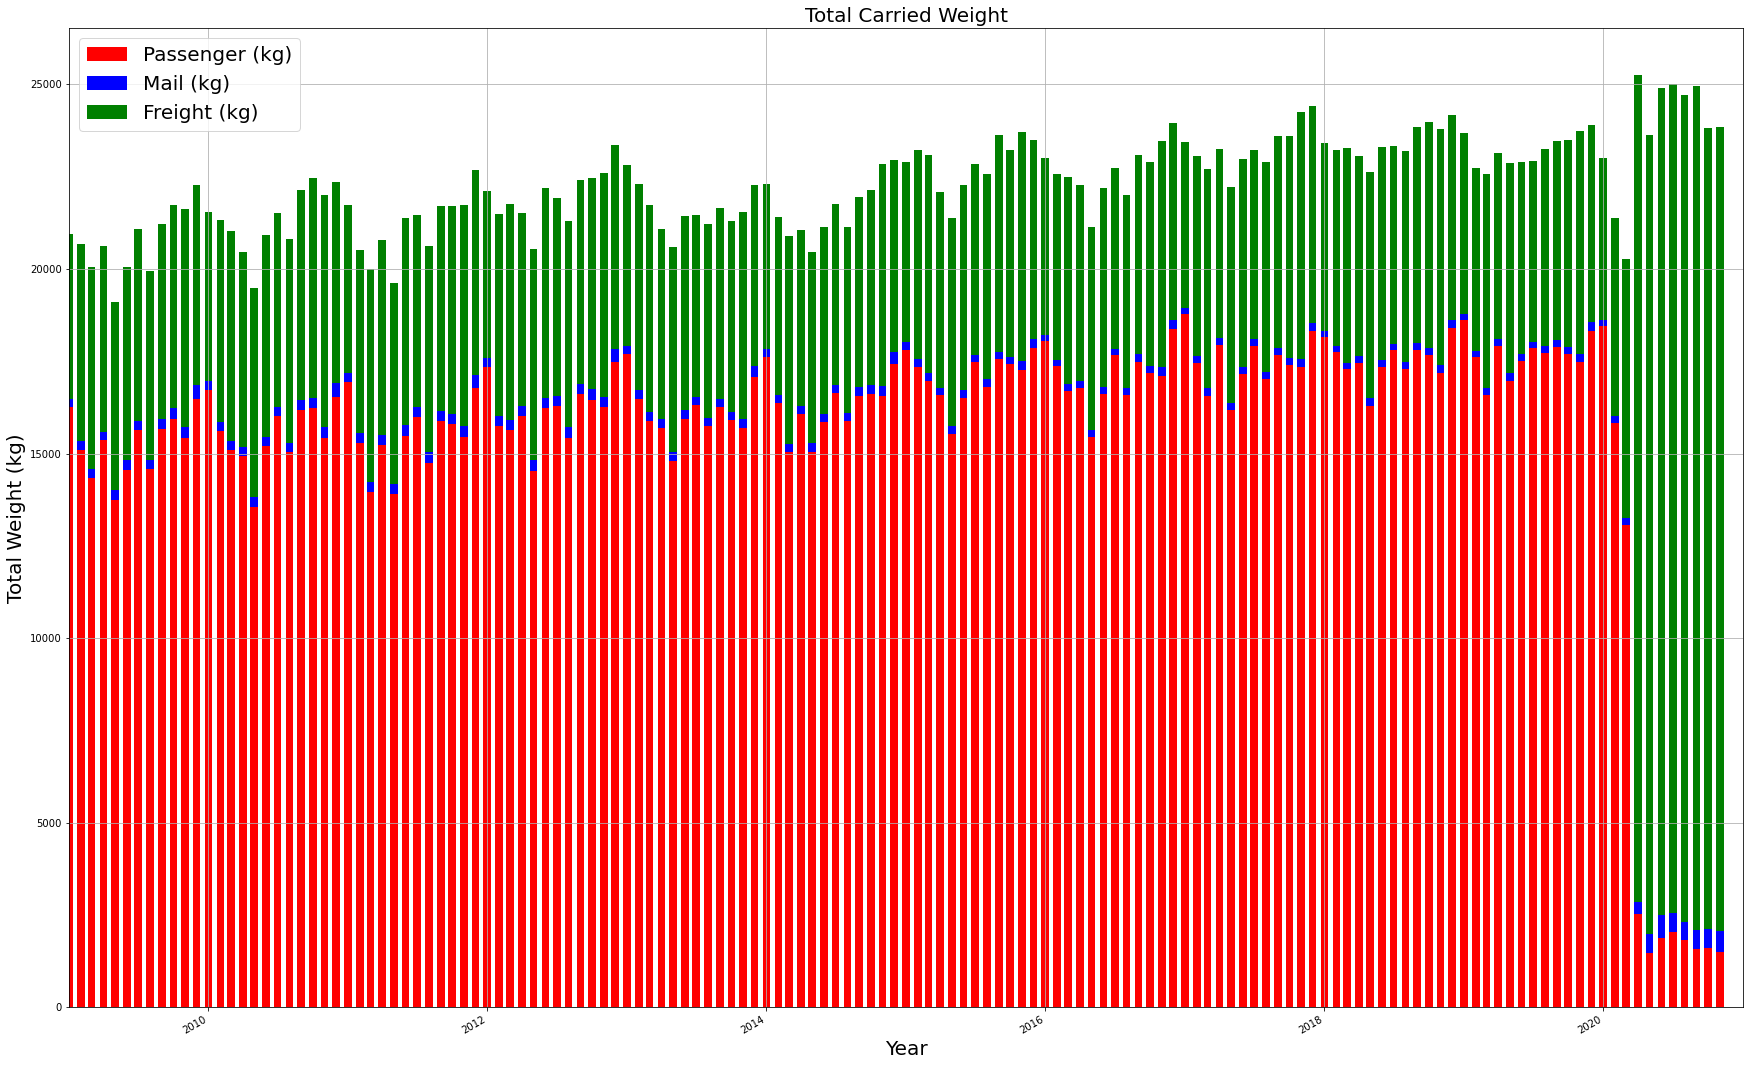

In [23]:
# Creating a stacked bar graph
# Can't get the x axes absolutely perfect, but it's good enough and has all the details

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y') # Formatting like this because stack overflow says this is how it be prettier

fig, ax = plt.subplots(figsize=(30,20))
# Dataset doesn't help us with legends, just lets us make it stacked
dataset1 = np.array(ratioData['passenger_weight_per_flight'])
dataset2 = np.array(ratioData['mail_per_flight'])
dataset3 = np.array(ratioData['freight_per_flight'])
ind = ratioData['date'] # x axes
width = 20 # How fat do you want the line? 

p1 = ax.bar(ind, dataset1, width, color='r',label='Passenger (kg)')
p2 = ax.bar(ind, dataset2, width, bottom=dataset1, color='b',label='Mail (kg)')
p3 = ax.bar(ind, dataset3, width, bottom=dataset1+dataset2, color='g',label='Freight (kg)')

# format the xlim appropriately 
lastdate = ratioData['date'][len(ratioData['date'])-1] # np wouldn't accept ratiodata['date'][-1], so I had to do this
datemin = np.datetime64(ratioData['date'][0], 'Y')
datemax = np.datetime64(lastdate, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax) 

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# just using a normal legend because it's easy
ax.legend(prop={'size':20})

fig.autofmt_xdate()
plt.title('Total Carried Weight',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total Weight (kg)', fontsize=20)
plt.savefig('../images/total_carried_weight_per_flight_stacked_bar.png')
plt.show()